# Lab 3

By Daniel Diamont (dd28977)
    Jerry Yang (jhy395)
    Zhaofeng Liang (zl4685)

## Question 1

A communication system consists of five parts- The information source which produces a message to be communicated to the receiving terminal, a transmitter which operates on the message in some way to produce a suitable signal, followed by the channel, the receiver, and destination. Teletype and telegraphy are some forms of a discrete channel for information transmission. A discrete source generates the message, which produces some sequence of symbols to communicate information. This could be in the form of dots or dashes. The communication is used with artificial languages to construct simple stochastic processes. This can be represented by discrete Markoff processes that group with special properties of significance in communication theory. There are also ergodic process, where every sequence produced by the process is the same in statistical properties. Roughly the ergodic property maintains statistical homogeneity. We can also define a quantity which measures how much information is produced by the Markoff process. The entropy in probabilities is very important to determine information theory with measures of certainty and uncertainty. There are also features such as conditional entropy, and the entropy of joint events. For each possible state, there is a set of entropies for each state with a set of probabilities. The rest seemed to be unrelated to entropy.

## Question 2

### 1. Top 10 most common words

In [6]:
import urllib.request as urllib2
import re

url = "http://proceedings.mlr.press/v70/"
#connect to a URL
website = urllib2.urlopen(url)

#read html code
html = website.read()

#use re.findall to get all the links to pdfs

links = re.findall(b'href=\"(.*?\.pdf)\"', html)

print('Number of PDF links detected: ' + str(len(links)))

links_cleaned = []

# remove supplemental pdfs
for link in links:
    if("supp.pdf" not in link.decode('utf-8')):
        links_cleaned.append(link)

print('Number of PDF links (excluding supplemental PDFs): ' + str(len(links_cleaned)))

Number of PDF links detected: 722
Number of PDF links (excluding supplemental PDFs): 434


In [8]:
# download all the pdfs and place in pdf_downloads folder
from urllib.request import urlretrieve
    
i = 0

for link in links_cleaned:
    try:
        link.decode('utf-8')
        urlretrieve(link.decode('utf-8'), 'pdf_downloads/' + 'download' + str(i) + ".pdf")
        i = i + 1
    except UnicodeEncodeError:
        i = i + 1
        


In [9]:
%%bash
cd $HOME"/Documents/Fall_2018/DSL/DataScienceLab/lab3/pdf_downloads"
echo "Number of PDF files downloaded: " $(ls *.pdf -1 | wc -l)

Number of PDF files downloaded:  434


Turn pdf files into text files

In [10]:
%%bash

# Author: Daniel Diamont

# Take pdfs in a directory and create .txt files from them

SRC=$HOME/"Documents/Fall_2018/DSL/DataScienceLab/lab3/pdf_downloads/*.pdf"

for filename in $SRC
do
    pdftotext $filename 2> /dev/null
done 

Check that we have the same number of text files

In [11]:
%%bash
cd $HOME"/Documents/Fall_2018/DSL/DataScienceLab/lab3/pdf_downloads/"
echo "Number of .txt files: " $(ls *.txt -1 | wc -l)


Number of .txt files:  435


In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/daniel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Processing:
1. turn everything to lowercase
2. strip out punctuation
3. remove numbers
4. remove strings of length smaller than 3
5. remove english stopwords

In [20]:
import nltk
from nltk.tokenize import RegexpTokenizer as tokenGen


word_list = []

import os
path = "pdf_downloads/"
print(path)

token_list = []

for file in os.listdir(path):
    print("Parsing file: " + file)
    if file.endswith(".txt"):
        file = open(path + file).read()
        file = file.lower()
        token_generator = tokenGen(r'[a-z]+')
        tokens = token_generator.tokenize(file)
        
        cleaned_tokens = tokens[:]
        for t in tokens:
            if (t in stopwords.words('english') and t in cleaned_tokens):
                cleaned_tokens.remove(t)
            if (len(t)<3 and t in cleaned_tokens):
                cleaned_tokens.remove(t)
        token_list.append(cleaned_tokens)
        
    

pdf_downloads/
Parsing file: download164.txt
Parsing file: download169.txt
Parsing file: download426.txt
Parsing file: download159.txt
Parsing file: download239.pdf
Parsing file: download348.txt
Parsing file: download427.txt
Parsing file: download257.txt
Parsing file: download82.txt
Parsing file: download277.txt
Parsing file: download301.pdf
Parsing file: download103.txt
Parsing file: download77.pdf
Parsing file: download352.pdf
Parsing file: download272.pdf
Parsing file: download27.pdf
Parsing file: download124.pdf
Parsing file: download221.pdf
Parsing file: download91.txt
Parsing file: download374.txt
Parsing file: download70.pdf
Parsing file: download107.pdf
Parsing file: download73.txt
Parsing file: download143.pdf
Parsing file: download54.pdf
Parsing file: download141.pdf
Parsing file: download23.pdf
Parsing file: download373.pdf
Parsing file: download248.pdf
Parsing file: download343.txt
Parsing file: download172.pdf
Parsing file: download127.txt
Parsing file: download154.txt
Par

Parsing file: download61.txt
Parsing file: download110.txt
Parsing file: download153.pdf
Parsing file: download125.pdf
Parsing file: download21.pdf
Parsing file: download263.txt
Parsing file: download132.pdf
Parsing file: download418.txt
Parsing file: download40.txt
Parsing file: download215.txt
Parsing file: download34.txt
Parsing file: download164.pdf
Parsing file: download379.txt
Parsing file: download142.pdf
Parsing file: download295.pdf
Parsing file: download43.pdf
Parsing file: download32.txt
Parsing file: download270.pdf
Parsing file: download173.pdf
Parsing file: download260.pdf
Parsing file: download10.pdf
Parsing file: download50.txt
Parsing file: download187.pdf
Parsing file: download226.pdf
Parsing file: download313.txt
Parsing file: download255.txt
Parsing file: download222.pdf
Parsing file: download76.pdf
Parsing file: download335.pdf
Parsing file: download197.pdf
Parsing file: download156.txt
Parsing file: download79.txt
Parsing file: download227.pdf
Parsing file: downlo

Parsing file: download273.txt
Parsing file: download151.pdf
Parsing file: download193.pdf
Parsing file: download106.txt
Parsing file: download303.pdf
Parsing file: download338.txt
Parsing file: download227.txt
Parsing file: download7.pdf
Parsing file: download266.txt
Parsing file: download90.pdf
Parsing file: download185.txt
Parsing file: download45.txt
Parsing file: download93.txt
Parsing file: download415.pdf
Parsing file: download305.txt
Parsing file: download355.pdf
Parsing file: download159.pdf
Parsing file: download301.txt
Parsing file: download357.pdf
Parsing file: download131.txt
Parsing file: download113.pdf
Parsing file: download244.pdf
Parsing file: download101.pdf
Parsing file: download346.pdf
Parsing file: download217.txt
Parsing file: download153.txt
Parsing file: download258.pdf
Parsing file: download191.txt
Parsing file: download17.txt
Parsing file: download309.txt
Parsing file: download178.pdf
Parsing file: download136.txt
Parsing file: download111.pdf
Parsing file: do

Parsing file: download253.pdf
Parsing file: download376.pdf
Parsing file: download401.txt
Parsing file: download428.txt
Parsing file: download33.txt
Parsing file: download275.txt
Parsing file: download393.pdf
Parsing file: download369.txt
Parsing file: download223.pdf
Parsing file: download261.pdf
Parsing file: download406.pdf
Parsing file: download209.txt
Parsing file: download234.pdf
Parsing file: download409.pdf
Parsing file: download273.pdf
Parsing file: download358.pdf
Parsing file: download390.txt
Parsing file: download6.pdf
Parsing file: download297.pdf
Parsing file: download372.pdf
Parsing file: download429.txt
Parsing file: download100.txt
Parsing file: download119.txt
Parsing file: download433.pdf
Parsing file: download186.txt
Parsing file: download180.txt
Parsing file: download296.txt
Parsing file: download79.pdf
Parsing file: download318.txt
Parsing file: download126.pdf
Parsing file: download279.txt
Parsing file: download52.pdf
Parsing file: download387.pdf
Parsing file: d

In [21]:
len(token_list)

435

In [22]:
import pickle as pkl
with open("token_list.pkl", "wb") as f:
    pkl.dump(token_list, f)

In [23]:
single_list = []

for token in token_list:
    single_list += token
    
print("{:,}".format(len(single_list)) + " words detected")

1,483,357 words detected


In [24]:
with open('token_list_flat.txt', 'w') as f:
    for item in single_list:
        f.write("%s\n" % item)

In [25]:
from collections import Counter

counter = Counter(single_list)
print("The 10 most common words in the dataset are: ")
print(counter.most_common(10))

The 10 most common words in the dataset are: 
[('learning', 12030), ('model', 8253), ('algorithm', 7921), ('data', 7743), ('set', 6052), ('function', 6000), ('using', 5577), ('neural', 5511), ('time', 5097), ('one', 4846)]


## Part 2
Let Z be a randomly selected word in a randomly selected ICML paper. Estimate the entropy
of Z.

In [26]:
import numpy as np

rlist = np.random.choice(token_list)
rword = np.random.choice(rlist)

count = 0

for token in rlist:
    if(rword == token):
        count = count + 1

# we are finding the entropy of a bernoulli random variable

pr = count/len(rlist) # turn this into a probability

E = -(pr*np.log2(pr) + (1-pr)*np.log2(1-pr)) # find the entropy of our random variable
print("Entropy(Z) = " + str(E))

Entropy(Z) = 0.11180482184875506


## Part 3
Synthesize a random paragraph using the marginal distribution over words.

In [27]:
# we want to find the probability of getting a word out of all the possible words that we have

freq_counts = {}
for word in (single_list):
    if word in freq_counts:
        freq_counts[word] += 1
    else:
        freq_counts[word] = 1


In [28]:
l = len(single_list)
value_list = []
key_list = []
for value in list(freq_counts.values()):
    value /= l
    value_list.append(value)
    
for key in freq_counts:
    key_list.append(key)

In [29]:
import numpy as np
words = np.random.choice(key_list, size=459, p=value_list)
paragraph = ""
for word in words:
    paragraph += (word + " ")


In [30]:
print(paragraph)

reproduction gamma including reinforcement figure density instructions gps receives figure factor using org matrix using sgn system thank regret achieve assumption complex decisions saga surrogate squared non introduction tong bounded figure sets posterior addresses range cannot number kian based trees memorizing easily jon lack scale principal springer hjl function satisfies optimization different suresh every burget step names approximate existing mehryar classes consistent neurons flat rmer provided environments solves covariance parameter stability jiang california sparsity patterns learning represented supervised general following estimate hessian measures biometrika xiao gradient experiments simulations abhishek probabilities algorithm along simple certain agent sparse operator parameters multiplication class suppose link problem function form nonparametric model show variance sec learning restricted features relates approach conditions train based leibo scenarios performs bounde

## Q3) Starting in Kaggle

In [3]:
# tabular data
import pandas as pd
import numpy as np
import sklearn as sk

# algorithms and helpers
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import skew
from scipy.stats import pearsonr
from pandas.plotting import scatter_matrix
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/home/daniel/Documents/Fall_2018/Data_Mining/data_science_principles/.env/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
# load data
path = "/home/daniel/Documents/Fall_2018/DSL/DataScienceLab/lab3"
train = pd.read_csv(path + "/kaggle/train.csv")
test = pd.read_csv(path + "/kaggle/test.csv")

### Feature Exploration 

In [5]:
from ToolKits.FeatureExplorer import FeatureExplorer

fe = FeatureExplorer(train, (10,10))

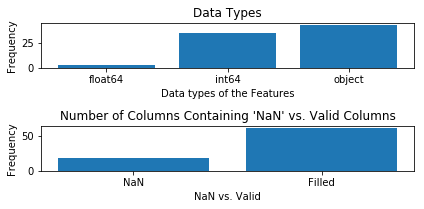

In [6]:
fe.dtype_info()

Here, we can see that our data is spread pretty evenly between numeric and categorical features. Since categorical features make up about half our data, we have to make sure that these features are encoded in such a way that our regressor can correctly interpret and use these features. We will use 'dummy encoding' for this purpose.

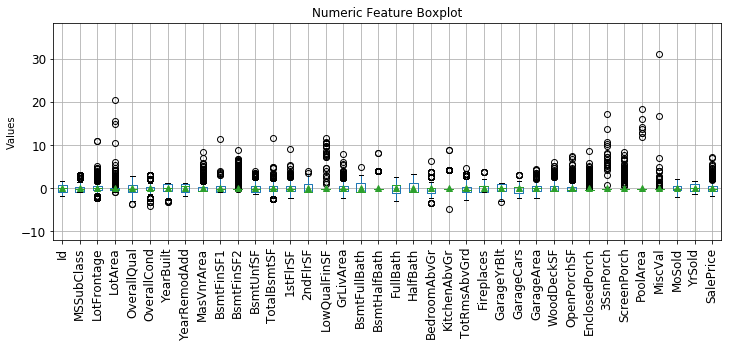

In [7]:
fe.univariate_analysis()

Here, we can see that a good portion of the numeric features in our dataset are heavily skewed. Note that for Ordinary Least Squares regression (OLS) and other unbiased estimators, one of the assumptions that must be made about the data set is *homoscedasticity*, which means that the errors (residuals) that our model makes should have the same variance. If we have skewed independent variables, the variance is misleading, as it provides the most useful information about a feature when a feature is symmetrical. As a result, our distribution of predicted values may be biased.

Additionally, we see that some of these features contain clear outliers. We should investigate some of these sources of outliers to see if they make sense.

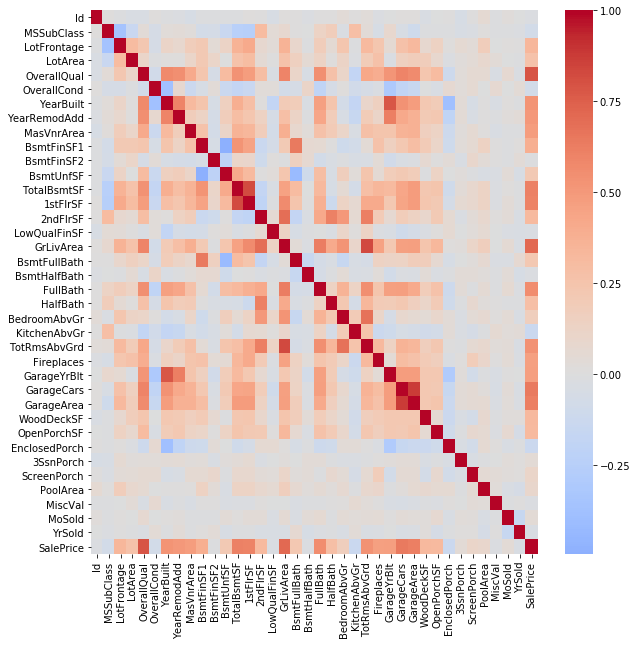

In [8]:
fe.multivariate_analysis()

Looking at either the bottom triangle or the upper triangle of the matrix, we see that about half of the features are uncorrelated with each other, and the other half of the features has some correlation with each other. Another assumption about OLS is that there is no *multicolinearity* in the features, meaning that we desire that the features be linearly uncorrelated with each other in order to produce the best results. It may be worth investigating some of these highly correlated features like GarageCars and GarageArea to see if we can transform or remove this data to decrease the multicolinearity of our features.

Additionally, looking at the SalePrice row, we see can identify a number of features that appear to be very positively correlated with the SalePrice of a house. It may be worth it to look into these features to examine if these features make good sense to use to train our model, and if the features themselves are correlated and why. A useful test to demonstrate the validity of these features to function as predictors could be to run Lasso regression to see if these same features have non-zero coefficients.

### Data Preprocessing and Feature Engineering

In [9]:
pd.set_option('display.max_columns',400)
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [10]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [11]:
all_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

Notice that MSSubClass consists of categorical variables but are listed an integers. This enforces a non-existent notion of distance on the feature. Let's replace with strings, then convert the categories to dummy variables.

In [12]:
ms_sub_class = np.array(all_data.MSSubClass)
dummy_dict = {
    "20": "A",
    "30": "B",
    "40": "C",
    "45": "D",
    "50": "E",
    "60": "F",
    "70": "G",
    "75": "H",
    "80": "I",
    "85": "J",
    "90": "K",
    "120": "L",
    "150": "M",
    "160": "N",
    "180": "O",
    "190": "P"
}

new_feature = []
for i in range(len(ms_sub_class)):
    key = str(ms_sub_class[i])
    if (key in dummy_dict.keys()):
        new_feature.append(dummy_dict.get(key))


In [13]:
all_data.MSSubClass = new_feature

In [14]:
all_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0          F       RL         65.0     8450   Pave   NaN      Reg         Lvl   
1          A       RL         80.0     9600   Pave   NaN      Reg         Lvl   
2          F       RL         68.0    11250   Pave   NaN      IR1         Lvl   
3          G       RL         60.0     9550   Pave   NaN      IR1         Lvl   
4          F       RL         84.0    14260   Pave   NaN      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0         2         1             3             1   
1           0.0           1.0         2         0             3             1   
2           1.0           0.0         2         1             3             1   
3           1.0           0.0         1         0             3             1   
4           1.0           0.0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd

The following numerical features will be removed because they are heavily correlated with each other.

1. Garage Year Built (correlates with Year Built)
2. Total Basement Square Footage (correlates with 1st Floor Square Footage)
3. Total Rooms Above Ground (correlates with Ground Living Area)

The following numerical features will be removed because they do not correlate at all with the target variable.

1. 3SsnPorch
2. MiscVal
3. MoSold
4. YrSold

In [15]:
list_cols_drop = ['GarageYrBlt','TotalBsmtSF','TotRmsAbvGrd','3SsnPorch','MiscVal','MoSold','YrSold','GarageArea']
all_data = all_data.drop(list_cols_drop,axis=1)

In [16]:
# dummy encoding for categorical variables
all_data = pd.get_dummies(all_data)

#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [17]:
all_data.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  1stFlrSF  2ndFlrSF  \
0       196.0       706.0         0.0      150.0       856       854   
1         0.0       978.0         0.0      284.0      1262         0   
2       162.0       486.0         0.0      434.0       920       866   
3         0.0       216.0         0.0      540.0       961       756   
4       350.0       655.0         0.0      490.0      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710           1.0           0.0         2         1   
1             0       1262           0.0           1.0         2         0   
2             0       1786           1.0           0.0         2         1   
3             0       1717           1.0           0.0         1         0   
4             0       2198           1.0           0.0         2         1   

   BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  WoodDeckSF  \
0             3             1           0         2.0           0   
1             3             1           1         2.0         298   
2             3             1           1         2.0           0   
3             3             1           1         3.0           0   
4             4             1           1         3.0         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  PoolArea  MSSubClass_A  \
0           61              0            0         0             0   
1            0              0            0         0             1   
2           42              0            0         0             0   
3           35            272            0         0             0   
4           84              0            0         0             0   

   MSSubClass_B  MSSubClass_C  MSSubClass_D  MSSubClass_E  MSSubClass_F  \
0             0             0             0             0             1   
1             0             0             0             0             0   
2             0             0             0             0             1   
3             0             0             0             0             0   
4             0             0             0             0             1   

   MSSubClass_G  MSSubClass_H  MSSubClass_I  MSSubClass_J  MSSubClass_K  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             1             0             0             0             0   
4             0             0             0             0             0   

   MSSubClass_L  MSSubClass_M  MSSubClass_N  MSSubClass_O  MSSubClass_P  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1          

In [18]:
#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

In [19]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [20]:
# rescale data
all_data = pd.DataFrame(StandardScaler().fit_transform(all_data),columns=all_data.columns.values)

In [21]:
all_data.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    -0.049717 -0.103719     0.646183    -0.507284   1.046258      0.896833   
1     0.588360  0.146544    -0.063185     2.188279   0.154764     -0.395604   
2     0.088781  0.457629     0.646183    -0.507284   0.980221      0.848965   
3    -0.295173  0.136301     0.646183    -0.507284  -1.859351     -0.682812   
4     0.738543  0.922662     1.355551    -0.507284   0.947203      0.753229   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  1stFlrSF  2ndFlrSF  \
0    1.207310    0.783085   -0.363104  -0.326929 -0.777287  1.196876   
1   -0.806456    0.892295   -0.363104   0.013451  0.424865 -0.863610   
2    1.135097    0.658017   -0.363104   0.240041 -0.554028  1.201129   
3   -0.806456    0.386799   -0.363104   0.356896 -0.419015  1.159720   
4    1.427464    0.757965   -0.363104   0.304932  0.123520  1.260739   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0     -0.116932   0.564627      1.087023     -0.251793  0.781366  1.232599   
1     -0.116932  -0.370371     -0.819679      3.888683  0.781366 -0.756321   
2     -0.116932   0.698477      1.087023     -0.251793  0.781366  1.232599   
3     -0.116932   0.577201      1.087023     -0.251793 -1.027363 -0.756321   
4     -0.116932   1.337430      1.087023     -0.251793  0.781366  1.232599   

   BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  WoodDeckSF  \
0      0.169927     -0.200513   -0.924311    0.306528   -0.945126   
1      0.169927     -0.200513    0.623632    0.306528    1.254212   
2      0.169927     -0.200513    0.623632    0.306528   -0.945126   
3      0.169927     -0.200513    0.623632    1.619961   -0.945126   
4      1.385655     -0.200513    0.623632    1.619961    1.085318   

   OpenPorchSF  EnclosedPorch  ScreenPorch  PoolArea  MSSubClass_A  \
0     0.832979      -0.427545    -0.309144 -0.066702     -0.765776   
1    -1.083169      -0.427545    -0.309144 -0.066702      1.305865   
2     0.663083      -0.427545    -0.309144 -0.066702     -0.765776   
3     0.580589       2.738802    -0.309144 -0.066702     -0.765776   
4     0.979467      -0.427545    -0.309144 -0.066702     -0.765776   

   MSSubClass_B  MSSubClass_C  MSSubClass_D  MSSubClass_E  MSSubClass_F  \
0     -0.223607     -0.045384      -0.07877     -0.330216      2.019040   
1     -0.223607     -0.045384      -0.07877     -0.330216     -0.495285   
2     -0.223607     -0.045384      -0.07877     -0.330216      2.019040   
3     -0.223607     -0.045384      -0.07877     -0.330216     -0.495285   
4     -0.223607     -0.045384      -0.07877     -0.330216      2.019040   

   MSSubClass_G  MSSubClass_H  MSSubClass_I  MSSubClass_J  MSSubClass_K  \
0     -0.214153     -0.089118     -0.205251     -0.129302     -0.196952   
1     -0.214153     -0.089118     -0.205251     -0.129302     -0.196952   
2     -0.214153     -0.089118     -0.205251     -0.129302     -0.196952   
3      4.669549     -0.089118     -0.205251     -0.129302     -0.196952   
4     -0.214153     -0.089118     -0.205251     -0.129302     -0.196952   

   MSSubClass_L  MSSubClass_M  MSSubClass_N  MSSubClass_O  MSSubClass_P  \
0     -0.257869     -0.018512     -0.214153     -0.076538     -0.146094   
1     -0.257869     -0.018512     -0.214153     -0.076538     -0.146094   
2     -0.257869     -0.018512     -0.214153     -0.076538     -0.146094   
3     -0.257869     -0.018512     -0.214153     -0.076538     -0.146094   
4     -0.257869     -0.018512     -0.214153     -0.076538     -0.146094   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0         -0.092944    -0.223607    -0.094801     0.537347    -0.432513   
1         -0.092944    -0.223607    -0.094801     0.537347    -0.432513   
2         -0.092944    -0.223607    -0.094801     0.537347    -0.432513   
3         -0.092944    -0.223607    -0.094801     0.537347    -0.432513   
4         -0.092944    -0.223607    -0.094801     0.537347    

In [96]:
#creating matrices for sklearn:
X = all_data[:train.shape[0]]
X_submission_test = all_data[train.shape[0]:]
y = train.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=20)

Ridge regression (using alpha = 0.1)

In [23]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train,y_train)
y_pred = ridge_model.predict(X_train)
mean_squared_error(y_train,y_pred)

0.007311873042921401

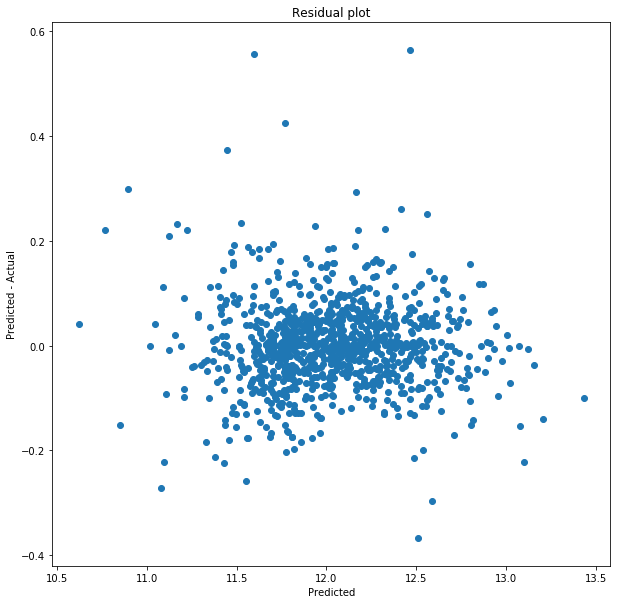

In [24]:
_ = plt.scatter(y_pred, y_pred-y_train)
_ = plt.title("Residual plot")
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Predicted - Actual")

In [25]:
y_test_pred = ridge_model.predict(X_test)
mean_squared_error(y_test_pred,y_test)

0.018270073504578724

In [26]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
mean_squared_error(y_train,y_pred)

0.007297271603623933

I do not trust this value too much, because linear regression performs no regularization

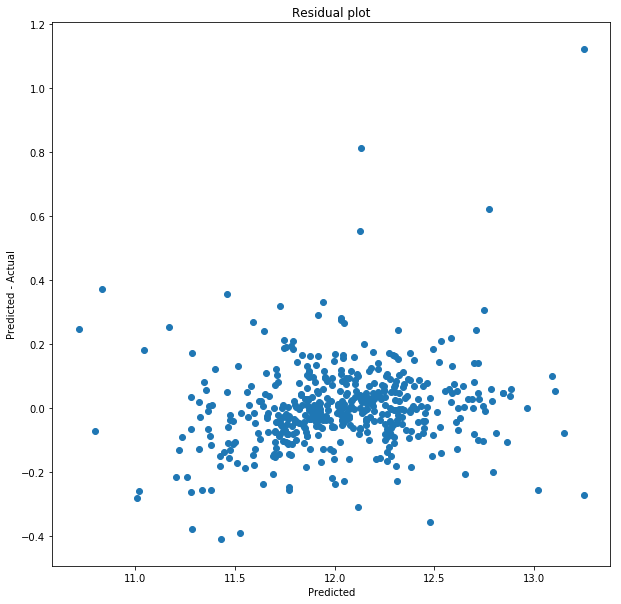

In [27]:
_ = plt.scatter(y_test_pred, y_test_pred-y_test)
_ = plt.title("Residual plot")
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Predicted - Actual")

In [28]:
y_test_pred = lr.predict(X_test)
mean_squared_error(y_test_pred,y_test)

2.629554000107313e+20

The error of the linear regressor on the test set is very large, demonstrating a classic example of overfitting to the training date. Better to use regularization with cross validation.

Lasso vs. Ridge Comparison (with Cross Validation)

In [29]:
# Lasso
alphas = 10**np.linspace(3,-3,100)

print("Cross validation using LassoCV\n")
lassoCV = LassoCV(alphas=alphas, cv=5, max_iter=1000)
lassoCV.fit(X_train, y_train)

print("Best Alpha is {:.5f}".format(lassoCV.alpha_))

lasso = Lasso(alpha=lassoCV.alpha_,tol=0.0001)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_train)
print("Lasso MSE: {:.5f}".format(mean_squared_error(y_train,y_pred)))

print("Cross validation using RidgeCV\n")
ridgeCV = RidgeCV(alphas=alphas, cv=5)
ridgeCV.fit(X_train, y_train)

print("Best Alpha is {:.5f}".format(ridgeCV.alpha_))

ridge = Ridge(alpha=ridgeCV.alpha_,tol=0.0001)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_train)
print("Ridge MSE: {:.5f}".format(mean_squared_error(y_train,y_pred)))



Cross validation using LassoCV

Best Alpha is 0.00534
Lasso MSE: 0.01031
Cross validation using RidgeCV

Best Alpha is 284.80359
Ridge MSE: 0.00922


In [30]:
y_pred = ridge.predict(X_test)
print("Ridge MSE: {:.5f}".format(mean_squared_error(y_test,y_pred)))

Ridge MSE: 0.01690


Plot $ l_{0} $ norm (number of nonzeros) of coefficients that Lasso produces as we vary strength of regularization parameter alpha.

In [31]:
k_alphas = []
lasso_coeffs = []

print("Cross validation using Lasso\n")
for alpha in alphas:    
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_coeffs.append(lasso.coef_)
    k_alphas.append(alpha)

Cross validation using Lasso



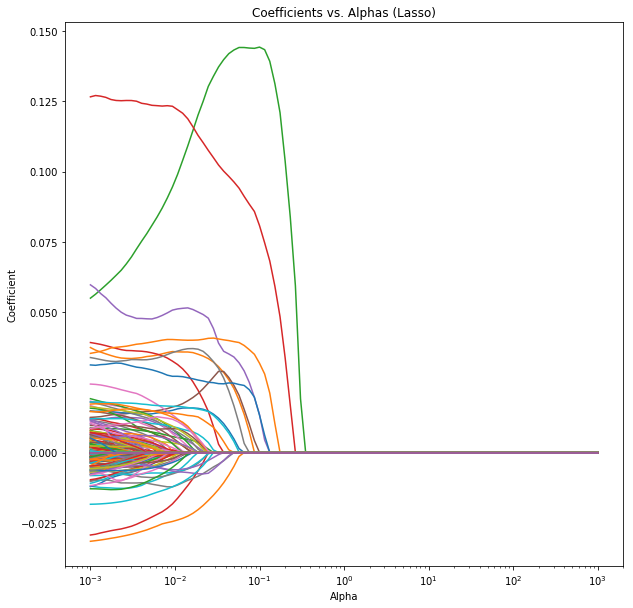

In [32]:
x_axis = 10
y_axis = 5
beta = []

for x in range(len(lasso_coeffs[0])):
    beta_x = []
    for y in range(len(lasso_coeffs)):
        beta_x.append(lasso_coeffs[y][x])

    beta.append(beta_x)    

for i in range(len(lasso_coeffs[0])):
    lin = 10**np.linspace(3,-3,len(beta[i]))
    plt.plot(lin,beta[i])
    fig_size = [x_axis,y_axis]
    plt.rcParams["figure.figsize"] = fig_size
    plt.xscale('log')
    plt.title("Coefficients vs. Alphas (Lasso)")
    plt.xlabel("Alpha")
    plt.ylabel("Coefficient");

Ensembling and Stacking

In [33]:
from sklearn.ensemble import BaggingRegressor

# use bagging regressor with bootstrapping (with replacement)
# base estimator is our ridgeCV model which is the best performer on the test set yet
# 10 base estimators
# use all available processors

ensemble_model = BaggingRegressor(base_estimator=ridgeCV,
                                  n_estimators=10,
                                  max_samples=0.66,
                                  max_features=1.0,
                                 bootstrap=True,
                                 bootstrap_features=True,
                                 oob_score=False,
                                 warm_start=False,
                                 n_jobs=-1)

ensemble_model.fit(X_train,y_train)

BaggingRegressor(base_estimator=RidgeCV(alphas=array([1.00000e+03, 8.69749e+02, ..., 1.14976e-03, 1.00000e-03]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False),
         bootstrap=True, bootstrap_features=True, max_features=1.0,
         max_samples=0.66, n_estimators=10, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [34]:
y_pred_ensemble = ensemble_model.predict(X_test)
print("Ensemble MSE: {:.5f}".format(mean_squared_error(y_test,y_pred_ensemble)))

Ensemble MSE: 0.01821


There is no real performance improvement on the test set. The error is very similar. Let's try the same technique with decision trees

In [35]:
bagged_trees = BaggingRegressor(n_estimators=100,
                                  max_samples=1.0,
                                  max_features=1.0,
                                 bootstrap=True,
                                 bootstrap_features=True,
                                 oob_score=False,
                                 warm_start=False,
                                 n_jobs=-1)

bagged_trees.fit(X_train,y_train)
y_pred_trees = bagged_trees.predict(X_test)
print("Ensemble MSE: {:.5f}".format(np.sqrt(mean_squared_error(y_test,y_pred_trees))))

Ensemble MSE: 0.14052


It seems that both models perform relatively well. Perhaps we can stack them together and tie them under an XGBoost Regressor.

XGBoost Regression (no tuning)

In [36]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [37]:
xgb_pred = xgb_model.predict(X_test)
print("XGB MSE: {:.5f}".format(mean_squared_error(y_test,xgb_pred)))

XGB MSE: 0.01713


Make prediction for test set

In [97]:
submission_prediction = ridgeCV.predict(X_submission_test)

In [98]:
submission_df = pd.DataFrame({"id":test.Id, "SalePrice":submission_prediction})

In [100]:
submission_df['SalePrice'] = np.expm1(submission_df['SalePrice'])

In [101]:
submission_df.to_csv("test_sol.csv", index = False)